# imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [7]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

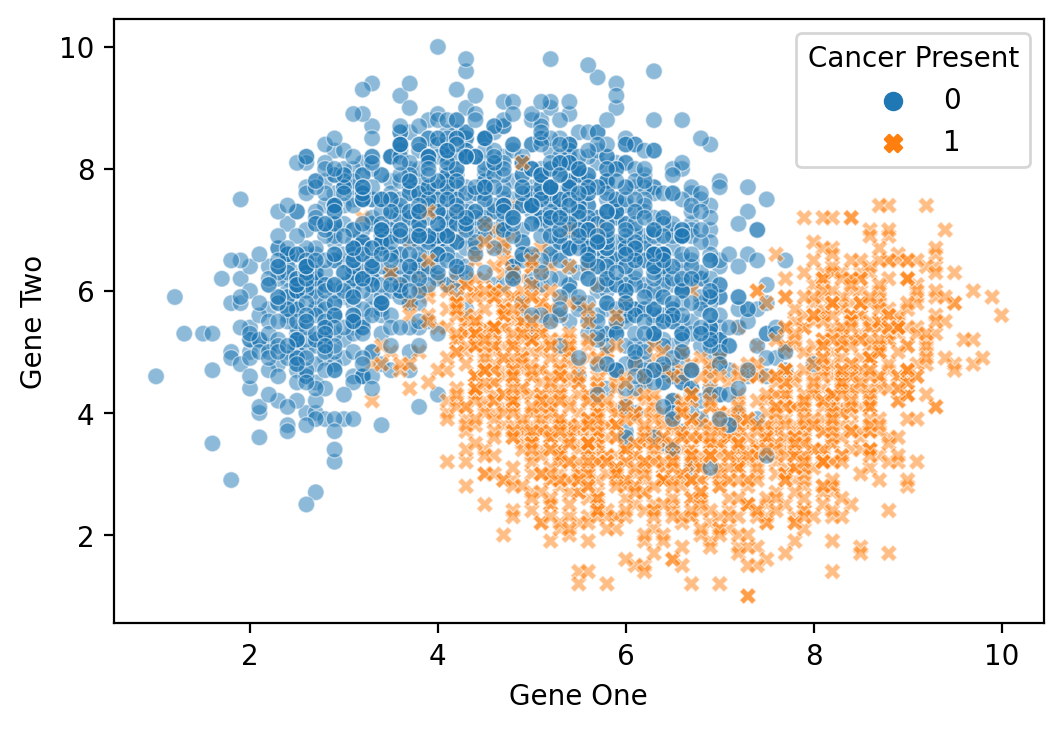

In [8]:
plt.figure(dpi=200)
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5,data=df,style='Cancer Present')

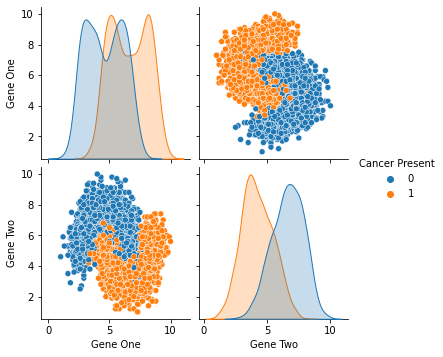

In [10]:
sns.pairplot(df,hue='Cancer Present')

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# StandardScaler

In [14]:
scale = StandardScaler()
scales_X_train = scale.fit_transform(X_train)
scale_X_test = scale.transform(X_test)

# Training the model with Train data

In [16]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(scales_X_train,y_train)

KNeighborsClassifier()

# Predecting the X_test data 

In [17]:
y_pred = knn_clf.predict(scale_X_test)

# checking the predection

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [19]:
accuracy_score(y_test,y_pred)

0.9272727272727272

In [46]:
confusion_matrix(y_test,y_pred)

array([[478,  32],
       [ 40, 440]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       510
           1       0.93      0.92      0.92       480

    accuracy                           0.93       990
   macro avg       0.93      0.93      0.93       990
weighted avg       0.93      0.93      0.93       990



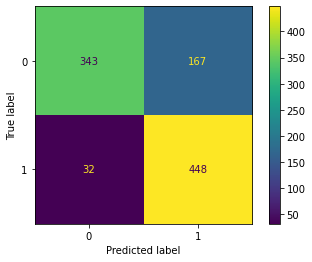

In [45]:
plot_confusion_matrix(knn_clf,X_test,y_test)

# Elbow Method for Choosing Reasonable K Values
**NOTE: This uses the test set for the hyperparameter selection of K.**

In [36]:
test_rates = []
for i in range(1,30):
    knn_cf = KNeighborsClassifier(n_neighbors=i)
    knn_cf.fit(scales_X_train,y_train)
    y_pred_test = knn_cf.predict(scale_X_test)
    acc = accuracy_score(y_pred_test,y_test)
    test_rates.append(acc)
    print(acc,i)

0.896969696969697 1
0.902020202020202 2
0.9212121212121213 3
0.9212121212121213 4
0.9272727272727272 5
0.9313131313131313 6
0.9363636363636364 7
0.9373737373737374 8
0.9343434343434344 9
0.9343434343434344 10
0.9363636363636364 11
0.9363636363636364 12
0.9353535353535354 13
0.9393939393939394 14
0.9444444444444444 15
0.9424242424242424 16
0.9434343434343434 17
0.9444444444444444 18
0.9424242424242424 19
0.9454545454545454 20
0.9424242424242424 21
0.9444444444444444 22
0.9414141414141414 23
0.9414141414141414 24
0.9404040404040404 25
0.9424242424242424 26
0.9434343434343434 27
0.9424242424242424 28
0.9414141414141414 29


Text(0.5, 0, 'K Value')

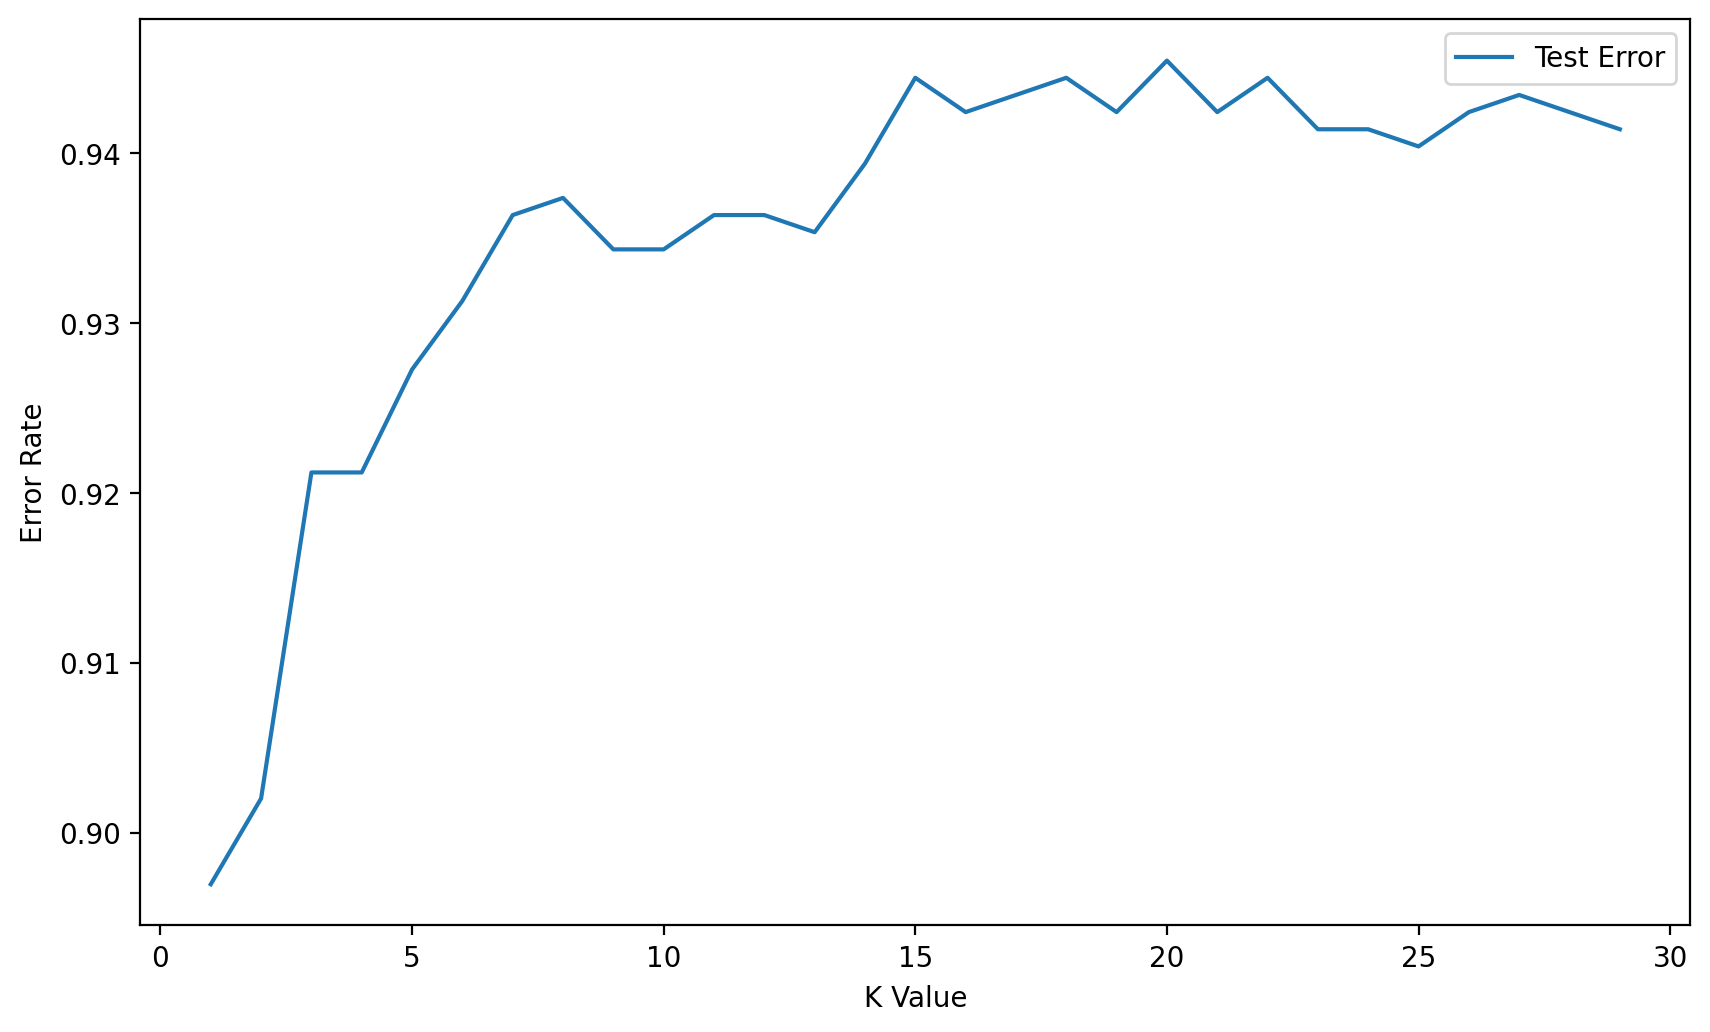

In [37]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Creating a Pipeline

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

**What happens can be discribed as follows:**

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

In [38]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=15)

In [39]:
operations = [('scaler',scaler),('knn',knn)]

In [40]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [42]:
pipe_pred= pipe.predict(X_test)

In [50]:
accuracy_score(y_test,pipe_pred)

0.9444444444444444

In [55]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       510
           1       0.95      0.93      0.94       480

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



In [58]:
confusion_matrix(y_test,pipe_pred)

array([[487,  23],
       [ 32, 448]], dtype=int64)

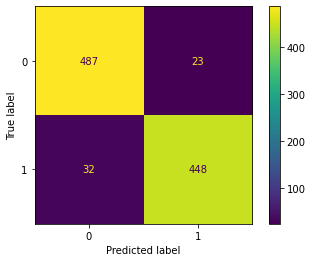

In [59]:
plot_confusion_matrix(pipe,X_test
                      ,y_test)

In [60]:
import pickle
file = open('knn.pkl','wb')
pickle.dump(pipe,file)